In [125]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import WordPunctTokenizer 
import os
import nltk.collocations as collocations
from nltk import FreqDist, bigrams
from itertools import chain
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/brittanysteenbergen/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/brittanysteenbergen/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/brittanysteenbergen/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [126]:
tk = WordPunctTokenizer() 
def tokenized(file):
    file = open(file, 'r')
    questions = file.readlines()
    questions = [line.lower() for line in questions]  
    questions = [tk.tokenize(doc) for doc in questions] 
    return questions

In [127]:
tokenized_files = []

def files():
    for file in os.listdir():
        if file.endswith(".txt"):
            print('File: ', file)
            tokenized_files.append(list(chain(*tokenized(file))))
files()
print(tokenized_files[0])

File:  mathematics.txt
File:  hhsc.txt
File:  hhsc_alum.txt
File:  elec_eng.txt
File:  physics.txt
File:  envir_sci.txt
File:  comp_sci.txt
File:  mech_eng.txt
File:  biology_chemistry.txt
['what', 'are', 'your', 'plans', 'after', 'graduation', '?', 'would', 'you', 'like', 'to', 'provide', 'a', 'non', '-', 'lmu', 'email', 'so', 'we', 'can', 'contact', 'you', 'after', 'graduation', '?', 'you', 'can', 'also', 'join', 'in', 'the', 'lmu', 'math', 'department', 'linkedin', 'network', '.', 'student', '-', 'faculty', 'relationship', 'and', 'department', 'environment', ':', 'during', 'your', 'time', 'in', 'the', 'math', 'department', ',', 'how', 'do', 'you', 'feel', 'about', 'your', 'relation', 'and', 'interaction', 'with', 'faculty', 'in', 'the', 'math', 'department', 'student', '-', 'student', 'relationships', 'in', 'the', 'department', 'advising', ':', 'how', 'do', 'you', 'feel', 'about', 'academic', 'program', 'advising', 'in', 'mathematics', 'the', 'way', 'advisors', 'are', 'assigned', 'c

In [128]:
def freq_dist(file):
    all_fdist = FreqDist(file).most_common(20)
    
    ## Conversion to Pandas series via Python Dictionary for easier plotting
    all_fdist = pd.Series(dict(all_fdist))
    
    ## Setting figure, ax into variables
    fig, ax = plt.subplots(figsize=(10,10))
    
    ## Seaborn plotting using Pandas attributes + xtick rotation for ease of viewing
    all_plot = sns.barplot(x=all_fdist.index, y=all_fdist.values, ax=ax)
    plt.xticks(rotation=30);

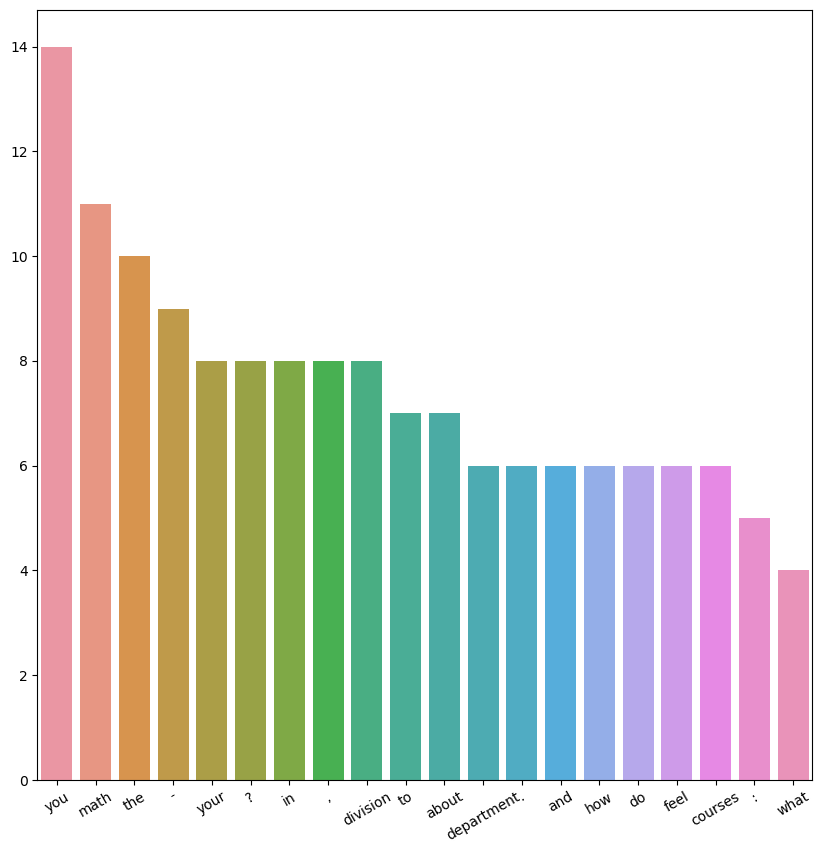

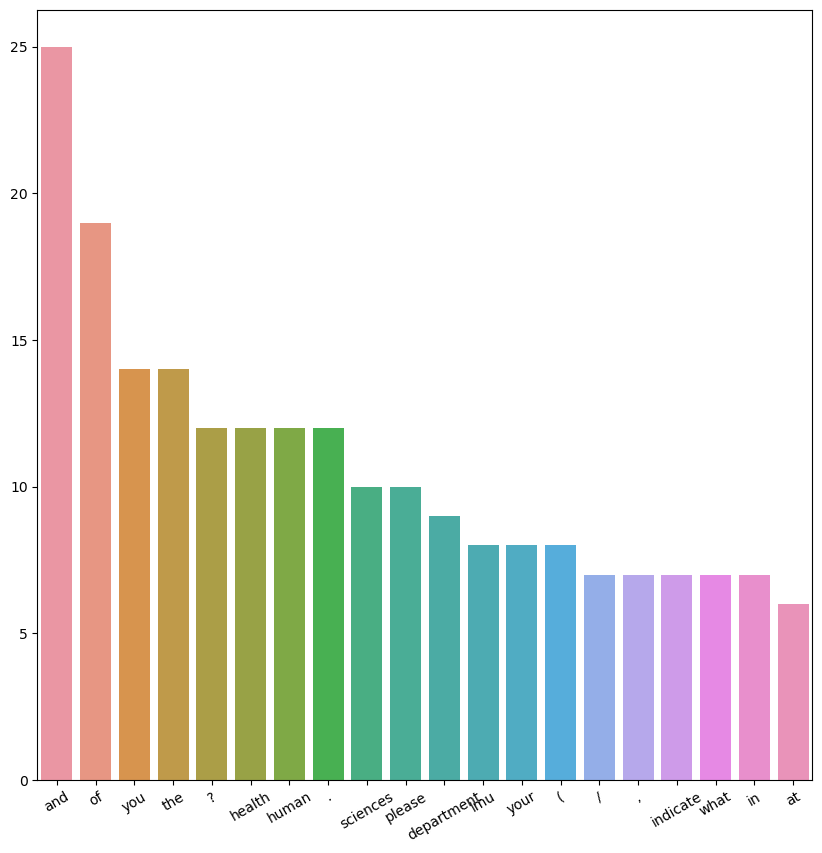

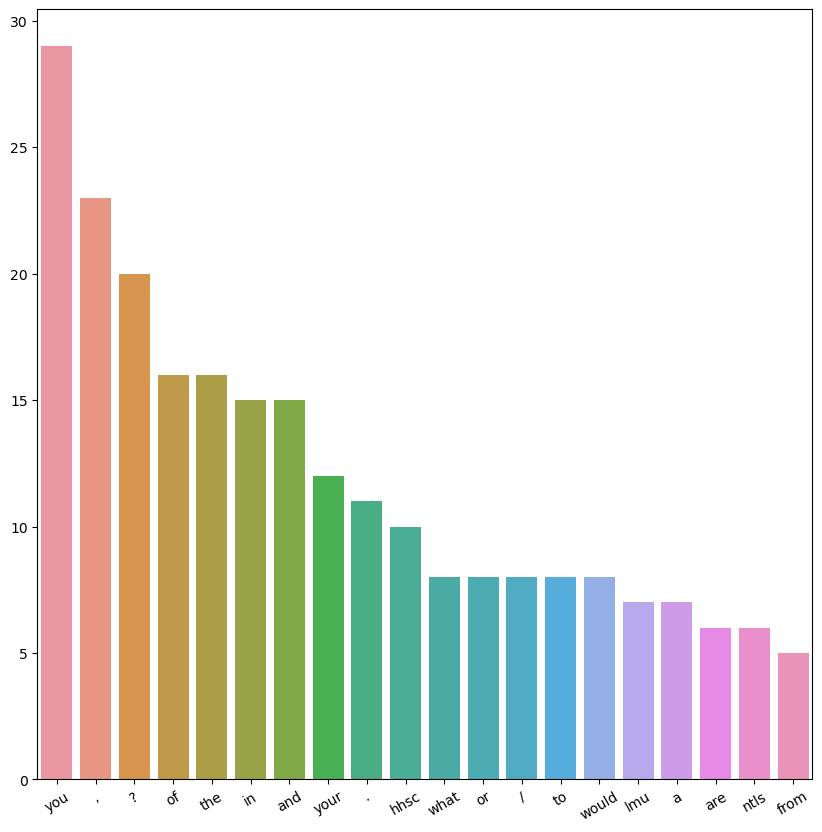

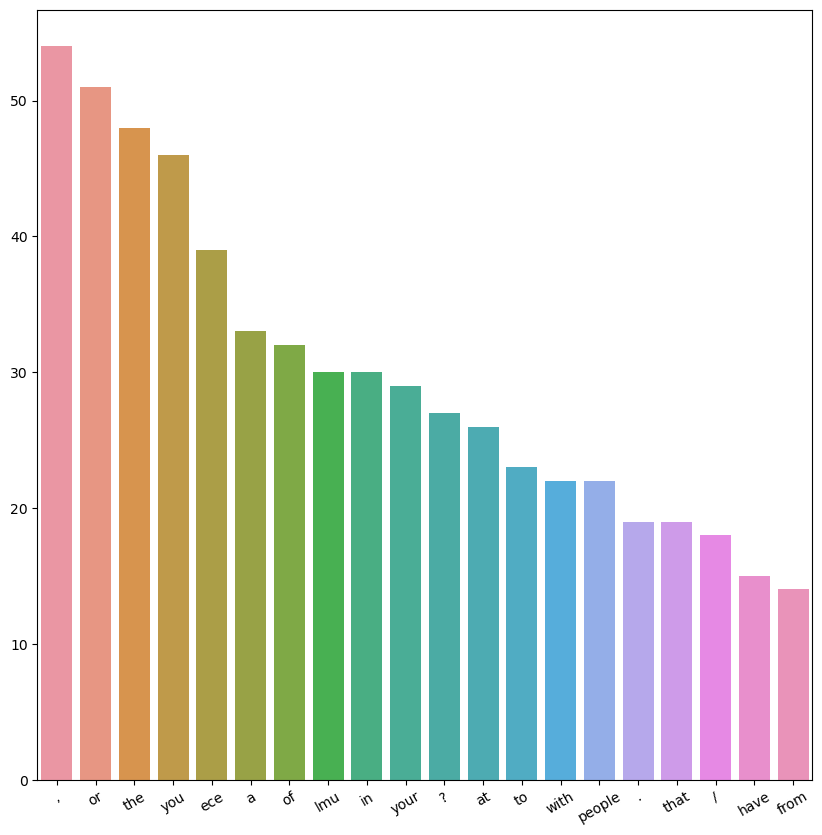

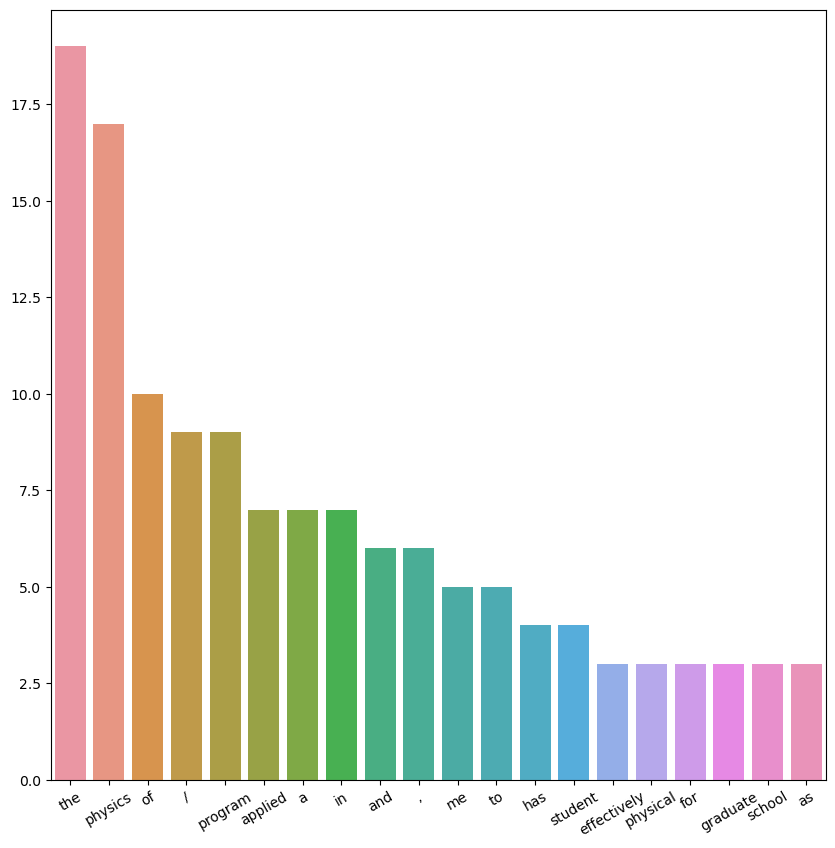

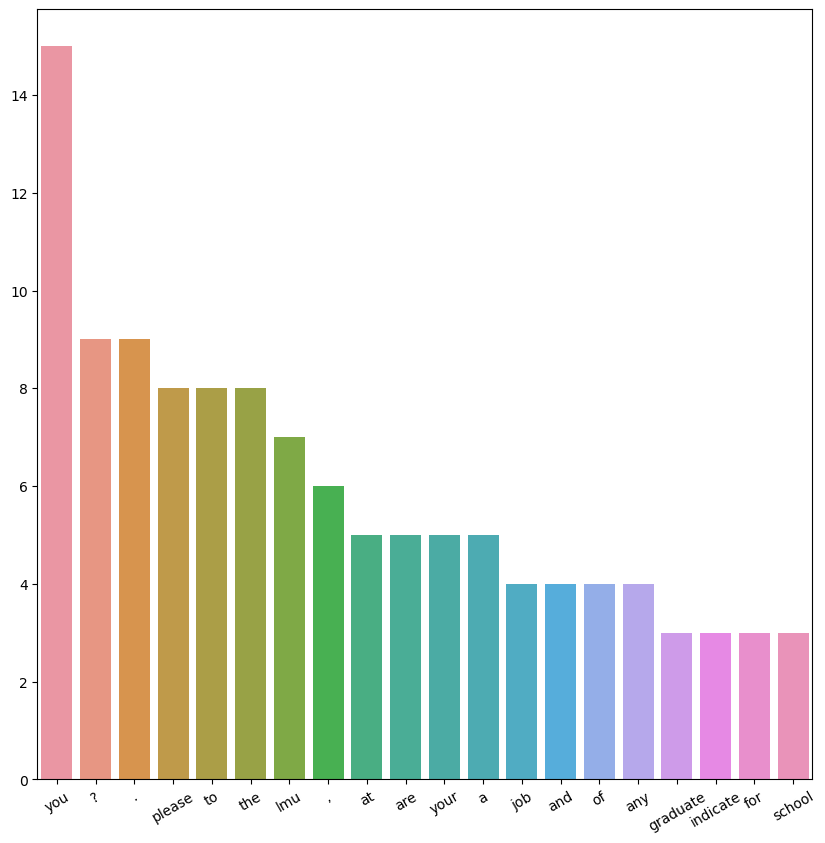

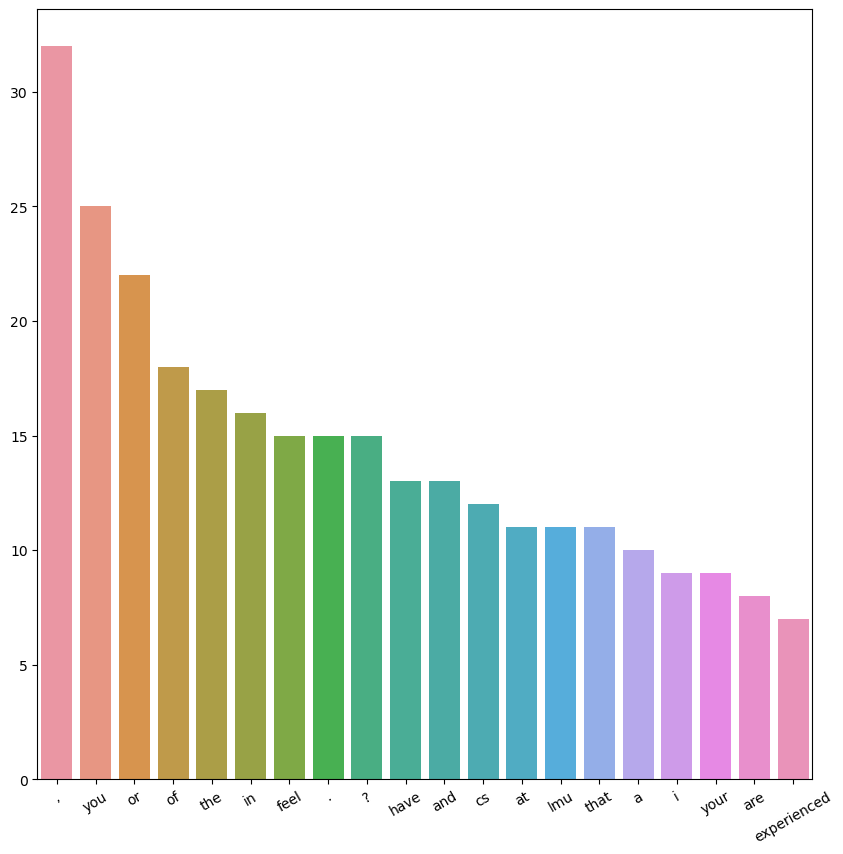

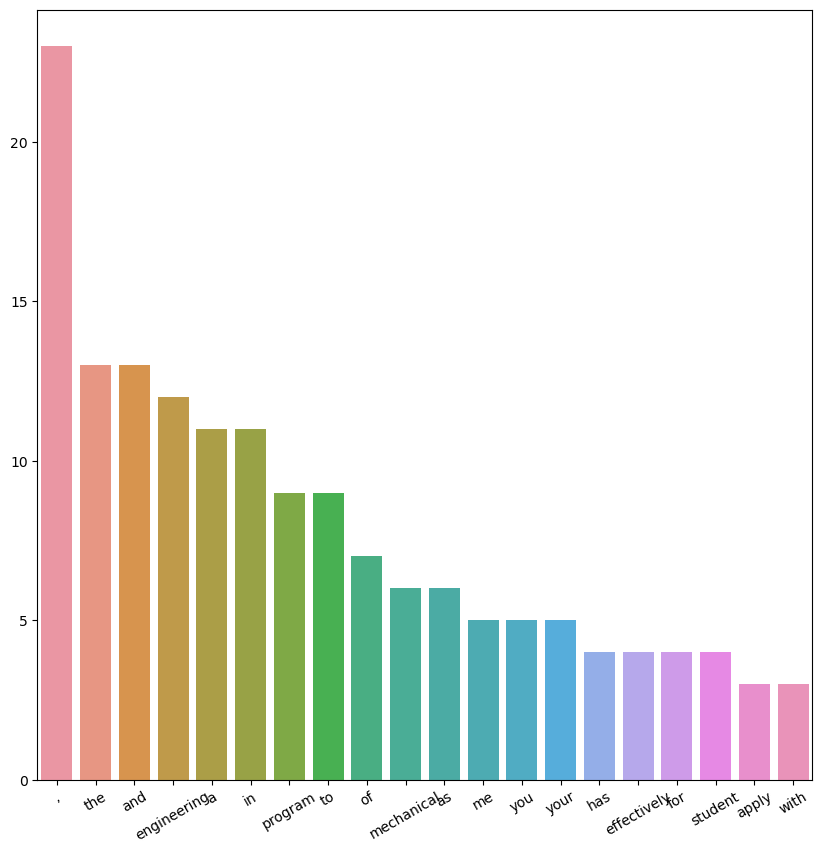

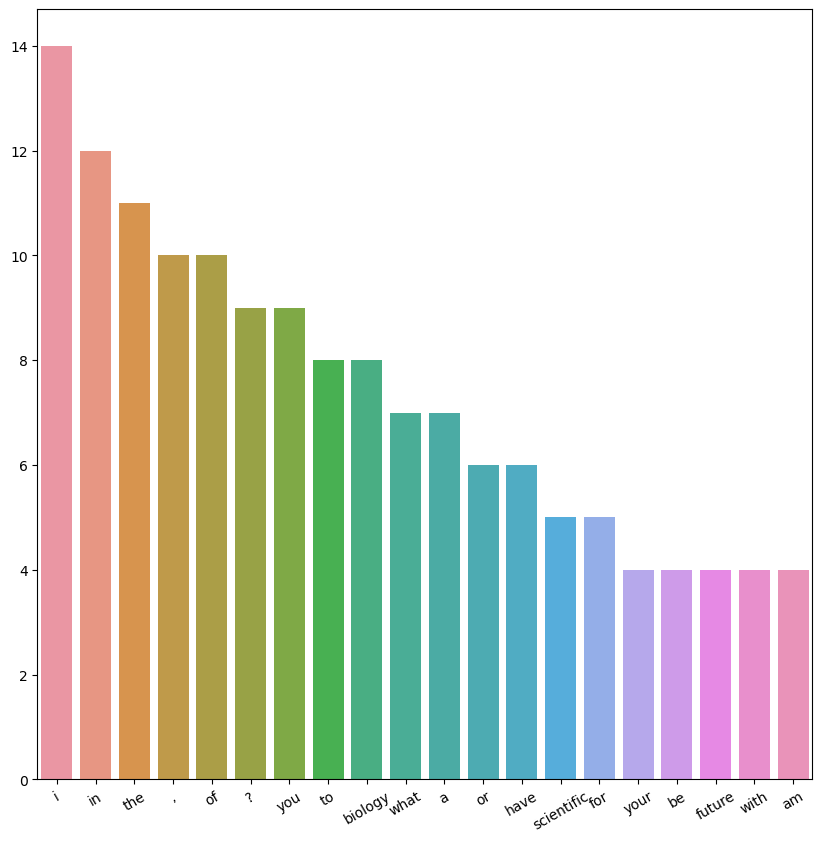

In [129]:
for file in tokenized_files:
    freq_dist(file)

In [130]:
def tokenizing_nltk(doc):
    doc_tokenized = doc
    
    wordnet_lemmatizer = WordNetLemmatizer()
    nltk_lemmaList = []
    for word in doc_tokenized:
        nltk_lemmaList.append(wordnet_lemmatizer.lemmatize(word))

    filtered_sentence = []  
    nltk_stop_words = set(stopwords.words("english"))
    my_stop_words = {"I", "4", "ha", "c", ")", ").", "|"}
    
    for w in nltk_lemmaList:  
        if w not in nltk_stop_words and w not in my_stop_words:  
            filtered_sentence.append(w)

    punctuations="?:!.,;-|()"
    for word in filtered_sentence:
        if word in punctuations:
            filtered_sentence.remove(word)

    return filtered_sentence

In [131]:
tokenizing_nltk(tokenized_files[0])

['plan',
 'graduation',
 'would',
 'like',
 'provide',
 'non',
 'lmu',
 'email',
 'contact',
 'graduation',
 'also',
 'join',
 'lmu',
 'math',
 'department',
 'linkedin',
 'network',
 'student',
 'faculty',
 'relationship',
 'department',
 'environment',
 'time',
 'math',
 'department',
 'feel',
 'relation',
 'interaction',
 'faculty',
 'math',
 'department',
 'student',
 'student',
 'relationship',
 'department',
 'advising',
 'feel',
 'academic',
 'program',
 'advising',
 'mathematics',
 'way',
 'advisor',
 'assigned',
 'career',
 'advising',
 'advising',
 'personal',
 'matter',
 'relevant',
 'lower',
 'division',
 'experience',
 'thought',
 'lower',
 'division',
 'course',
 'work',
 'math',
 'level',
 'difficulty',
 'lower',
 'division',
 'math',
 'course',
 'transition',
 'high',
 'school',
 'university',
 'non',
 'course',
 'experience',
 'e',
 'g',
 'dorm',
 'added',
 'freedom',
 'etc',
 'upper',
 'division',
 'experience',
 'thought',
 'difficulty',
 'level',
 'upper',
 'divisio

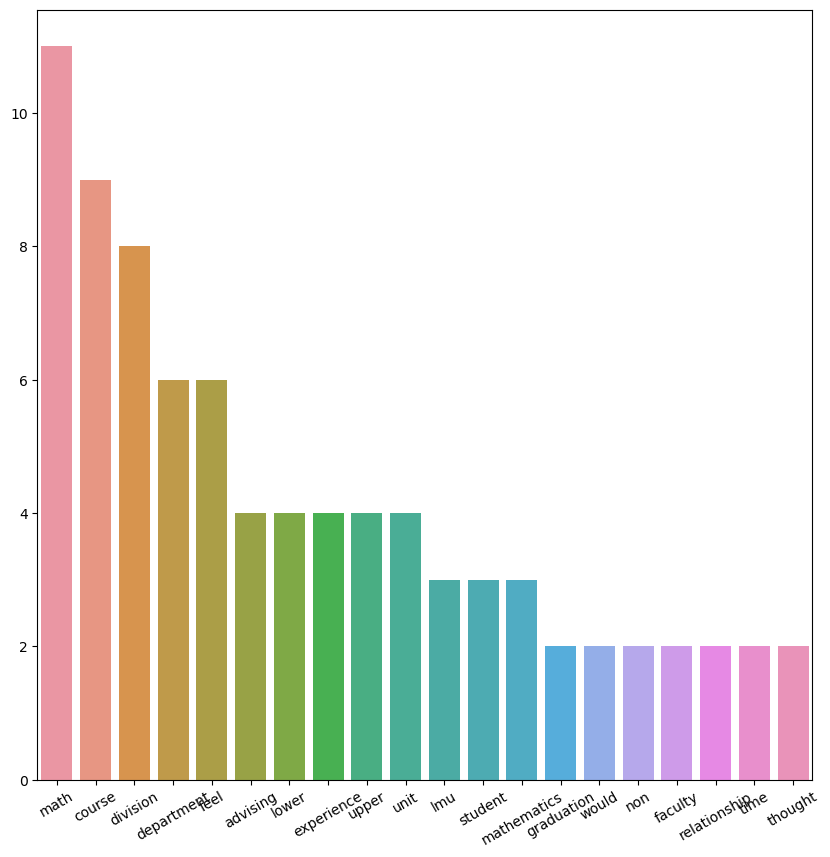

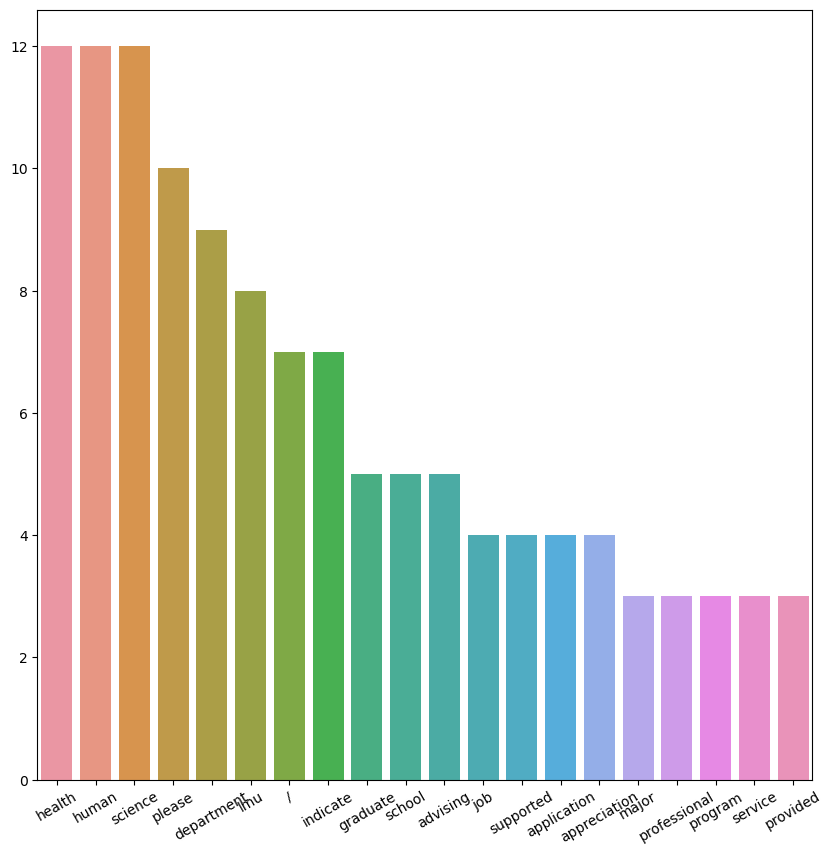

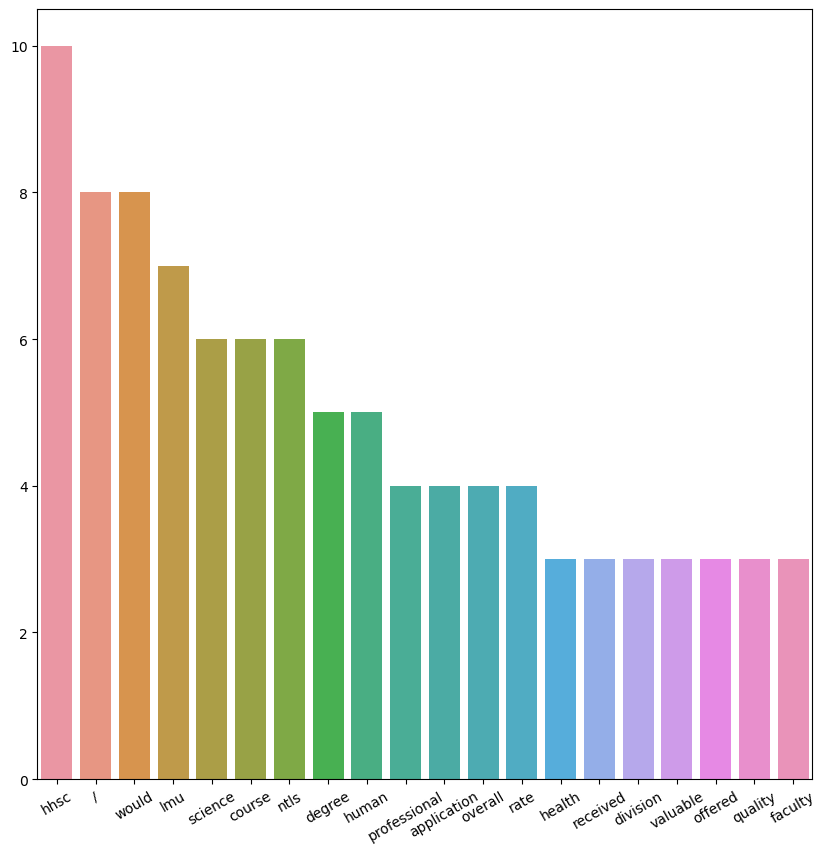

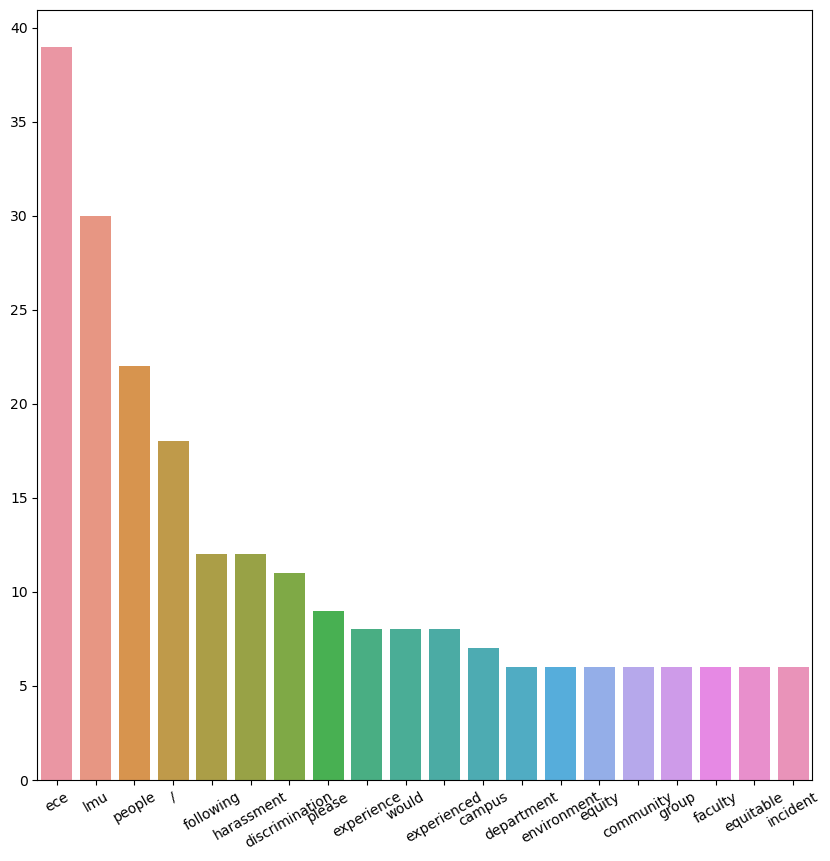

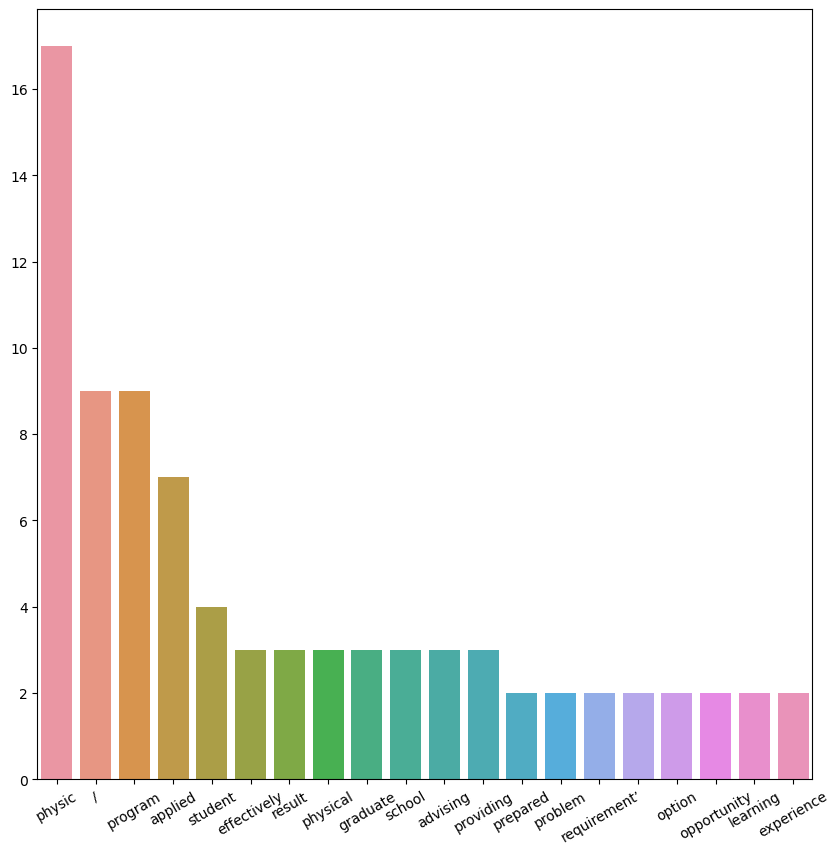

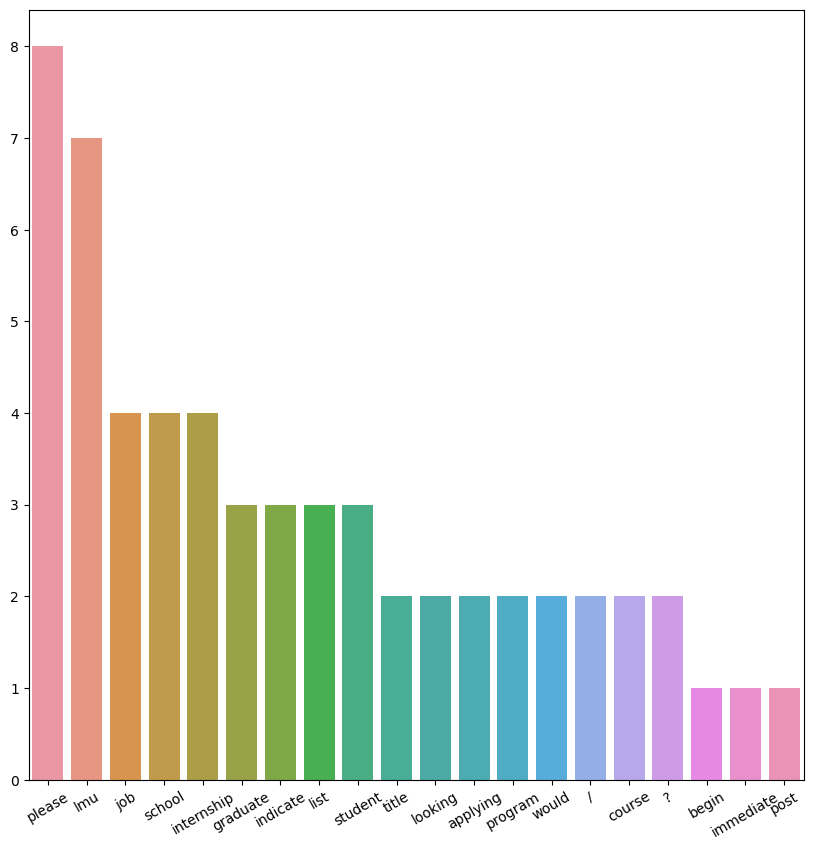

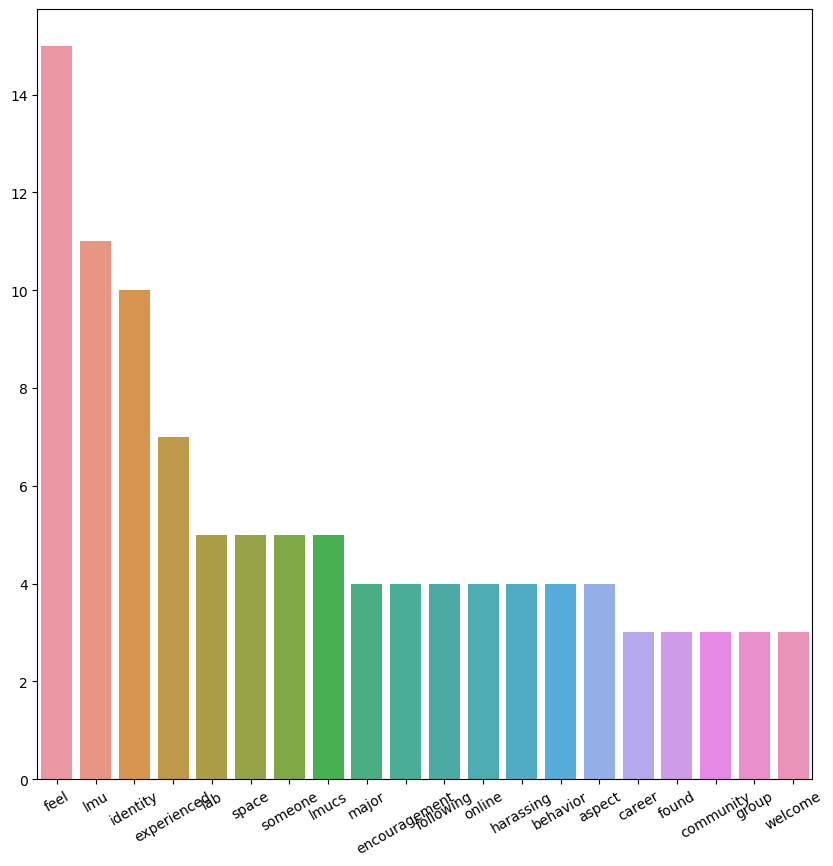

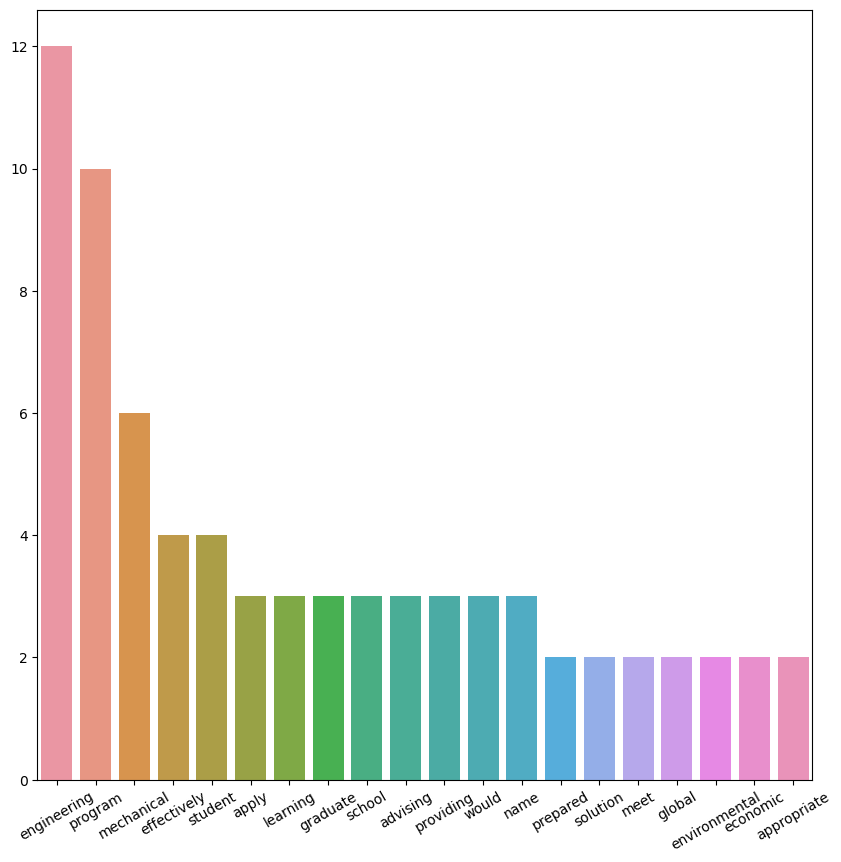

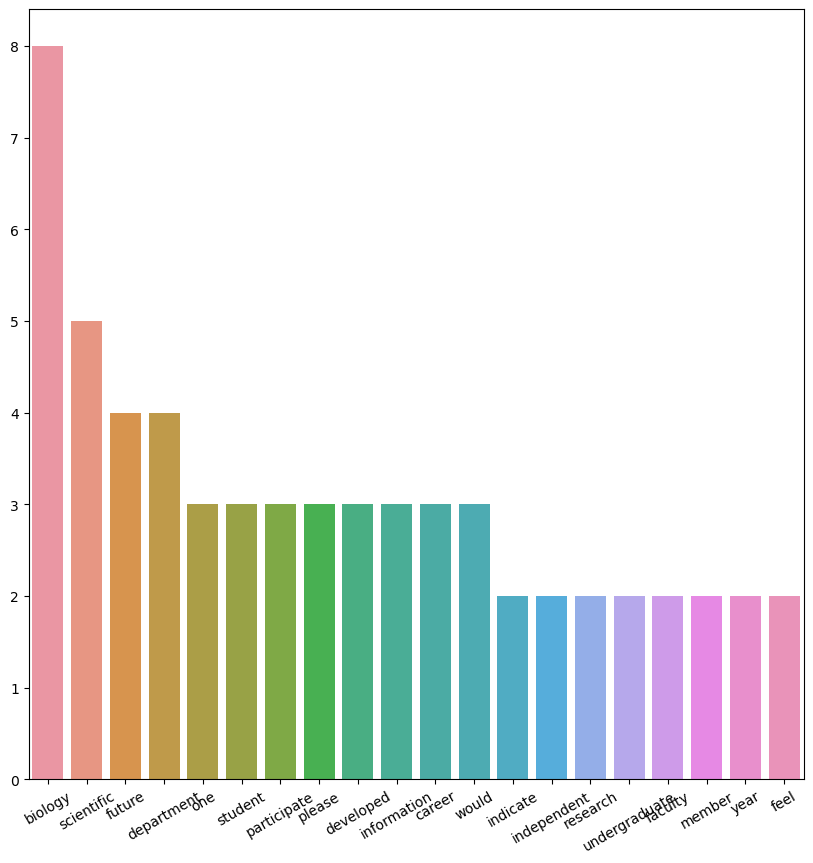

In [132]:
for file in tokenized_files:
    filtered = tokenizing_nltk(file)
    freq_dist(filtered)